In [ ]:
!pip install telebot

In [ ]:
import telebot
import requests

API_TOKEN = '7006358365:AAE2eRsaTKJRzVXrK4lkJUwP6S-_GDByRJI'

bot = telebot.TeleBot(API_TOKEN)


# Handle '/start' and '/help'
@bot.message_handler(commands=['help', 'start'])
def send_welcome(message):
    bot.reply_to(message, """\
Hi there, I am EchoBot.
I am here to echo your kind words back to you. Just say anything nice and I'll say the exact same thing to you!\
""")


# Handle all other messages with content_type 'text' (content_types defaults to ['text'])


@bot.message_handler(content_types=['photo'])
def handle_photo(message):
    photo = message.photo[-1]
    file_info = bot.get_file(photo.file_id)
    downloaded_file = bot.download_file(file_info.file_path)
    save_path = 'photo.jpg'
    with open(save_path, 'wb') as new_file:
        new_file.write(downloaded_file)
    bot.reply_to(message, 'Фотография сохранена.')
    #вызываем апи нашей модели
    #получаем фотографию с рамкой
    #отправляем пользователю в ответ на его сообщение
bot.infinity_polling()


2024-07-18 16:54:59,989 (__init__.py:1221 MainThread) ERROR - TeleBot: "Threaded polling exception: A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running"
ERROR:TeleBot:Threaded polling exception: A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
2024-07-18 16:54:59,994 (__init__.py:1223 MainThread) ERROR - TeleBot: "Exception traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/telebot/__init__.py", line 1214, in __threaded_polling
    polling_thread.raise_exceptions()
  File "/usr/local/lib/python3.10/dist-packages/telebot/util.py", line 111, in raise_exceptions
    raise self.exception_info
  File "/usr/local/lib/python3.10/dist-packages/telebot/util.py", line 93, in run
    task(*args, **kwargs)
  

KeyboardInterrupt: 

In [ ]:
!pip install roboflow supervision opencv-python

In [ ]:
!pip install inference

Detections(xyxy=array([[ 284.,  212., 1071.,  803.]]), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]), confidence=array([0.513]), class_id=array([1]), tracker_id=None, data={'class_name': array(['Car-Damage'], dtype='<U10')})


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


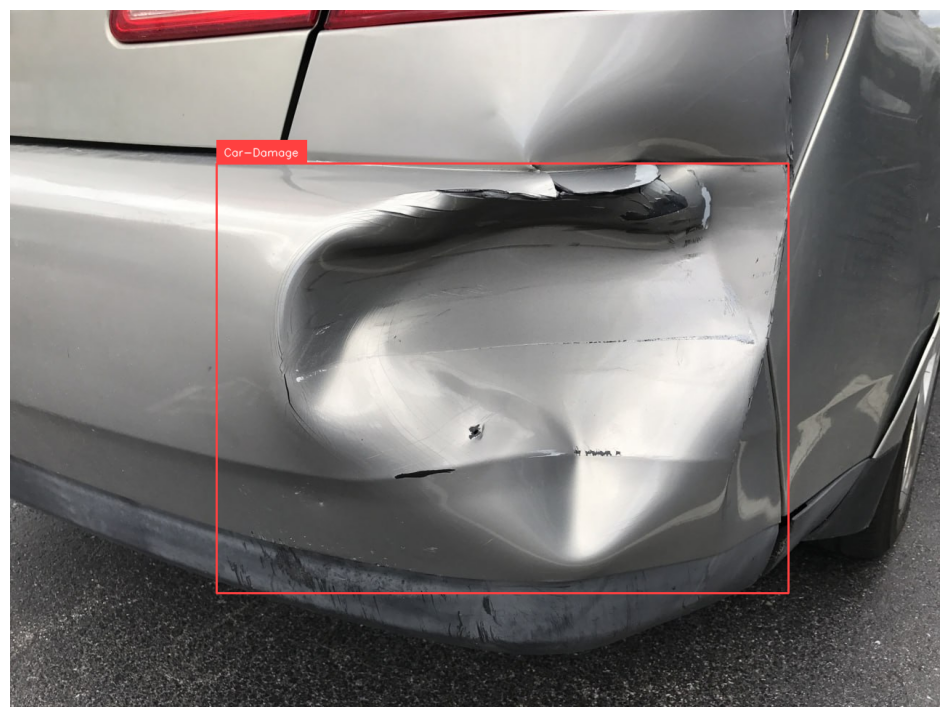

In [ ]:
from inference import get_model
import supervision as sv
import cv2

# define the image url to use for inference
image_file = "photo.jpg"
image = cv2.imread(image_file)

# load a pre-trained yolov8n model
model = get_model(model_id="car-damage-coco-dataset/4", api_key="bpBEGQKQ0Xzm4n4L3VPs")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)
print(detections)
# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)